<a href="https://colab.research.google.com/github/abuwildanm/food-recognition/blob/master/Create_Custom_Dataset_From_Google_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Custom Dataset From Google Images

## Download images from google

Source:
1. [Google Images Download Documentation](https://google-images-download.readthedocs.io/en/latest/)
2. [How to save Google search images with a single command](https://dev.to/tomox0115/how-to-save-google-search-images-with-a-single-command-1o4c)

In [1]:
# Update app in OS
!apt-get update
# Install chromedriver
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bi

In [2]:
# Install google images downloader
!git clone https://github.com/Joeclinton1/google-images-download.git
%cd google-images-download
!sudo python setup.py install

Cloning into 'google-images-download'...
remote: Enumerating objects: 674, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 674 (delta 1), reused 1 (delta 0), pack-reused 666
Receiving objects: 100% (674/674), 309.72 KiB | 17.21 MiB/s, done.
Resolving deltas: 100% (391/391), done.
/content/google-images-download
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:645: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating google_images_download.egg-info
writing google_images_download.egg-info/PKG-INFO
writing dependency_links to google_images_download.egg-info/dependency_links.txt
writing entry points to google_images_download.egg-info/entry_points.txt
writing requirements to google_images_download.egg-info/requires.txt
writing top-le

In [3]:
# Download images from google images
!googleimagesdownload --keywords "nasi putih,telur dadar,tahu goreng,tempe goreng" --limit 120 --format jpg --chromedriver $(which chromedriver)


Item no.: 1 --> Item name = nasi putih
Evaluating...
Getting you a lot of images. This may take a few moments...
/usr/local/lib/python3.7/dist-packages/selenium-4.0.0b3-py3.7.egg/selenium/webdriver/remote/webdriver.py:612: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
/usr/local/lib/python3.7/dist-packages/selenium-4.0.0b3-py3.7.egg/selenium/webdriver/remote/webdriver.py:412: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
Reached end of Page.
Starting Download...
Completed Image ====> 1.nasi_putih_in_indonesia.jpg
Completed Image ====> 2.nasi_dibentuk_bulat.jpg
Completed Image ====> 3.nasi-putih-1.jpg
Completed Image ====> 4.nasi_putih.jpg
Completed Image ====> 5.white-rice-on-plate-nasi-260nw-1813461655.jpg
Co

## Rename images & categories

In [4]:
%cd ..

/content


In [5]:
# Copy downloaded images into dataset directory
!cp -r google-images-download/downloads/ ./dataset

In [6]:
import os

map_categories = {'nasi putih':'rice', 
                  'tahu':'tofu', 
                  'telur dadar':'omelette',
                  'tempe goreng':'tempeh'}

# Rename categories
for before, after in map_categories.items():
    os.rename('dataset/{}'.format(before), 'dataset/{}'.format(after))

In [7]:
from glob import glob

print('Number of images')
categories = os.listdir('./dataset')
for cat in categories:
    print('{}: {}'.format(cat, len(glob('dataset/{}/*'.format(cat)))))

Number of images
tofu: 120
omelette: 120
rice: 120
tempeh: 120


In [10]:
# Remove invalid images
all_image = glob('dataset/*/*')
for img_path in all_image:
    if os.path.getsize(img_path) == 0 and os.path.exists(img_path):
        os.remove(img_path)

In [12]:
print('Number of valid images')
categories = os.listdir('./dataset')
for cat in categories:
    print('{}: {}'.format(cat, len(glob('dataset/{}/*'.format(cat)))))

Number of valid images
tofu: 119
omelette: 120
rice: 120
tempeh: 120


In [13]:
# Rename each image from each category
for cat in categories:
    for i, path in enumerate(sorted(glob('dataset/{}/*'.format(cat))), 1):
        dirname = os.path.dirname(path)
        src = path
        dst = os.path.join(dirname, '{}-{}.jpg'.format(cat, i))
        # Rename images
        os.rename(src, dst)

## Create dataset

In [14]:
# Make train and test directory
os.makedirs('dataset/train', exist_ok=True)
os.makedirs('dataset/test', exist_ok=True)

# Make category directory in train and test
for cat in categories:
    os.makedirs('dataset/train/{}'.format(cat), exist_ok=True)
    os.makedirs('dataset/test/{}'.format(cat), exist_ok=True)

In [21]:
import numpy as np
import shutil

# Pick 20 images from each category to test directory
test_size = 20
for cat in categories:
    all_cat_image = glob('dataset/{}/*'.format(cat))
    np.random.shuffle(all_cat_image)
    test_set = all_cat_image[:test_size]
    for img_path in sorted(test_set):
        # Move image if test category directory is empty
        if len(os.listdir('dataset/test/{}'.format(cat))) <= test_size:
            shutil.move(img_path, 'dataset/test/{}'.format(cat))

# Move the rest images to train directory
train_size = 100
for cat in categories:
    for img_path in sorted(glob('dataset/{}/*'.format(cat))):
        # Move image if train category directory is empty
        if len(os.listdir('dataset/train/{}'.format(cat))) <= train_size:
            shutil.move(img_path, 'dataset/train/{}'.format(cat))

In [22]:
print('Total Images')
for cat in categories:
    print('{}: {}'.format(cat, len(glob('dataset/{}/*'.format(cat)))))

print('='*20)
print('Train Images')
for cat in categories:
    print('{}: {}'.format(cat, len(glob('dataset/train/{}/*'.format(cat)))))

print('='*20)
print('Test Images')
for cat in categories:
    print('{}: {}'.format(cat, len(glob('dataset/test/{}/*'.format(cat)))))

Total Images
tofu: 0
omelette: 0
rice: 0
tempeh: 0
Train Images
tofu: 99
omelette: 100
rice: 100
tempeh: 100
Test Images
tofu: 20
omelette: 20
rice: 20
tempeh: 20


In [23]:
# Remove parent category directory
for cat in categories:
    shutil.rmtree('dataset/{}'.format(cat), ignore_errors=True)

In [27]:
import matplotlib.pyplot as plt

def show_images(category, data_type='train', size=10):
    img_path = glob('dataset/{}/{}/*'.format(data_type, category))
    np.random.shuffle(img_path)
    nrows = 2
    ncols = size / nrows
    fig = plt.figure(figsize=(15, 14))
    for idx in range(size):
        ax = fig.add_subplot(nrows, ncols, idx+1, xticks=[], yticks=[])
        image = plt.imread(img_path[idx])
        plt.imshow(image)

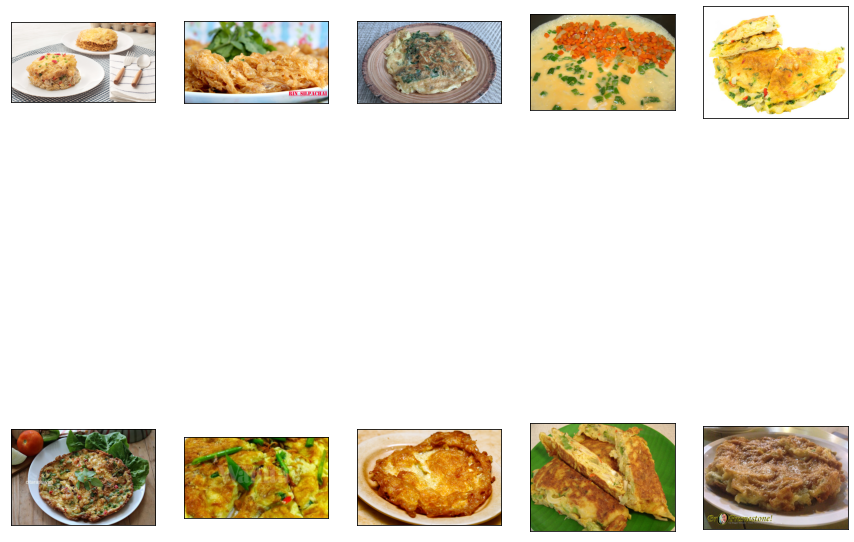

In [33]:
show_images('omelette')

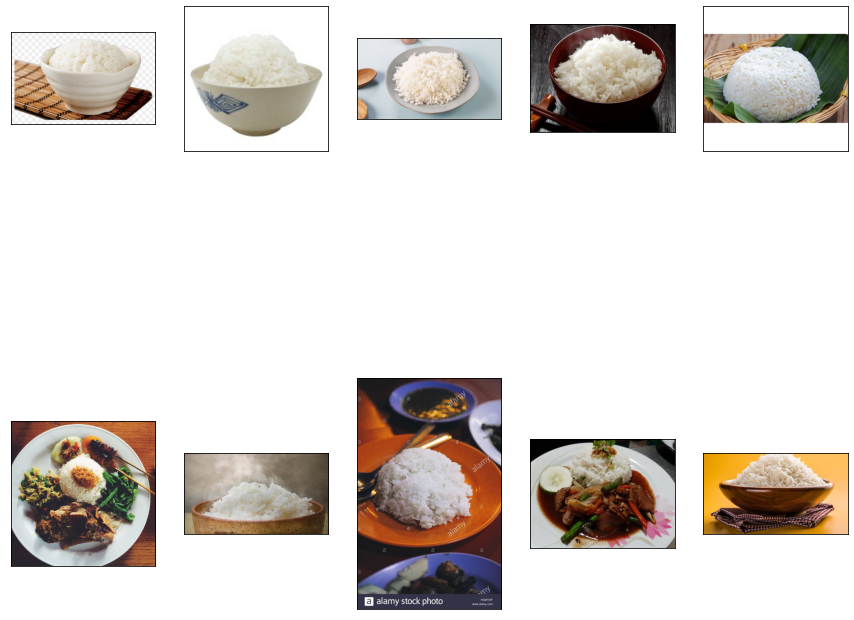

In [30]:
show_images('rice')

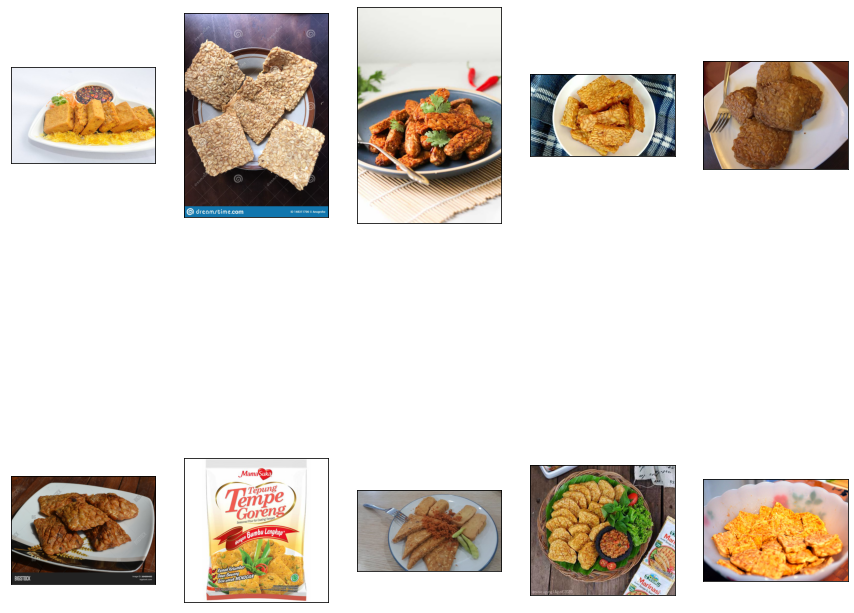

In [36]:
show_images('tempeh')

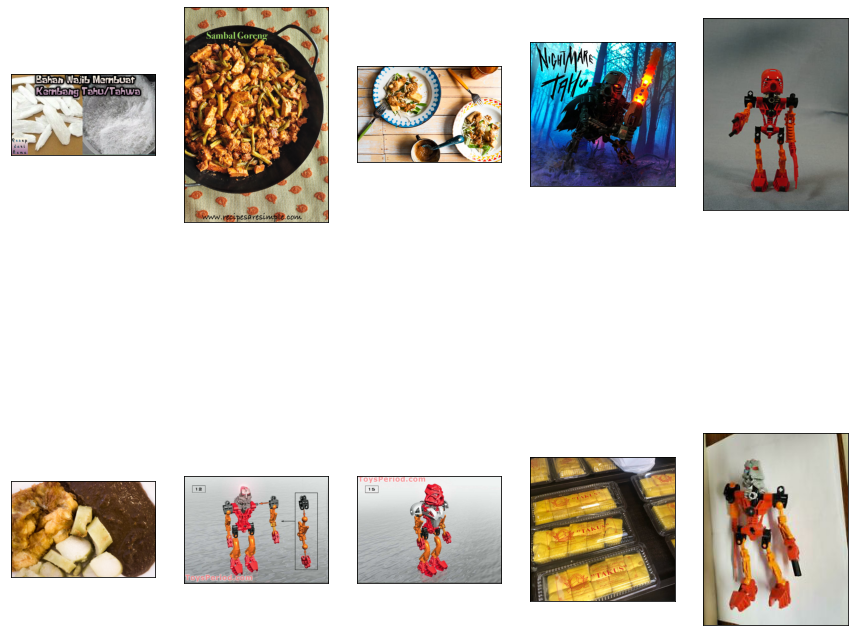

In [39]:
show_images('tofu')